# How it works - Decision Trees and Random Forests in Python

Author: Cleiber Garcia

Pourpose: Develop competencies on how Decision Trees and Random Forests works with Python

This Notebook was produced as part of my studies of the course 'Python for Data Science and Machine Learning Bootcamp', taught by Mr Jose Portilla, Head of Data Science at Pierian Training. The course is offered ad Udemy (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5784218?start=15#overview).

Although the degree of similarity between this notebook and the notebook written by Jose Portillo for this course is almos 100%, I assure you that I wrote it line by line. Also, I took the liberty to make some changes in order to clariry some examples or to make code more readable, when I judged it apropriate.

For more information, please contact me at cleiber.garcia@gmail.com

# 1. Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Load the Working Data Set

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
df.shape

(81, 4)

# 2. Exploratory Data Analysis

In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


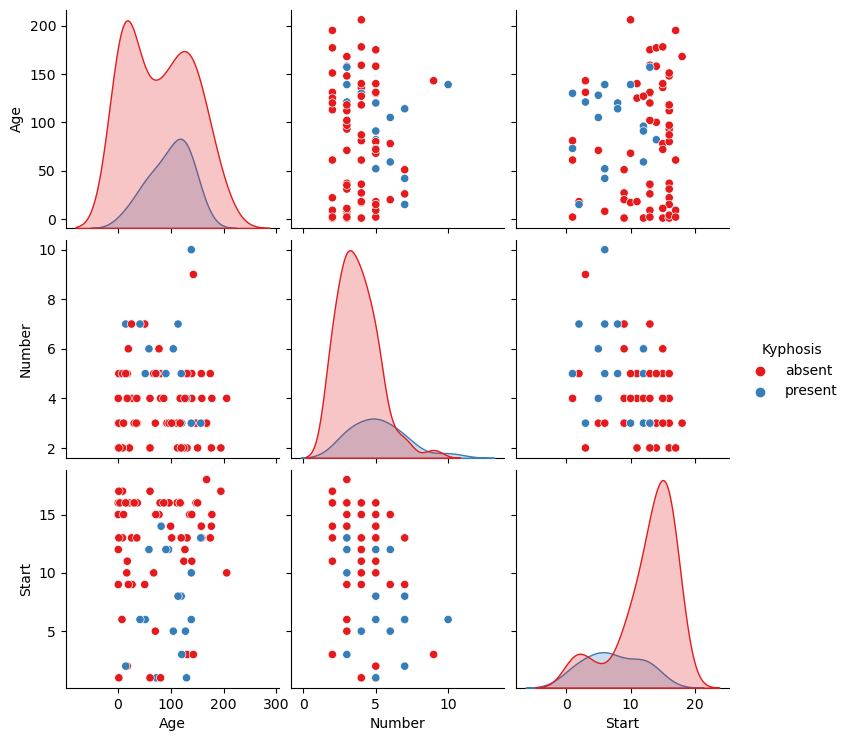

In [10]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

# 3. Split Data into Train and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Features
X = df.drop('Kyphosis', axis=1)X

In [19]:
# Target
y = df['Kyphosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# 4. Applying Decision Trees

## 4.1 Train the Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## 4.2 Prediction and Evaluation of DTC

In [24]:
predictions = dtree.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(confusion_matrix(y_test, predictions))

[[12  7]
 [ 3  3]]


In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.80      0.63      0.71        19
     present       0.30      0.50      0.37         6

    accuracy                           0.60        25
   macro avg       0.55      0.57      0.54        25
weighted avg       0.68      0.60      0.63        25



## 4.3 Interpretation of DTC's Classification Report

* Precision (same as accuracy): 80% of 100% of values assigned as positive are actually positive, and
    20% of 100% assigned as positive are actually false positives, i.e. they are actually negative.

* Recall (same as sensitivity): 37% (100% - 63%) of values assigned as negative, are in reality positive values.

## 4.4 Tree Visualization

In [47]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [48]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [49]:
# Extract featurex from df (dataframe)
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [50]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

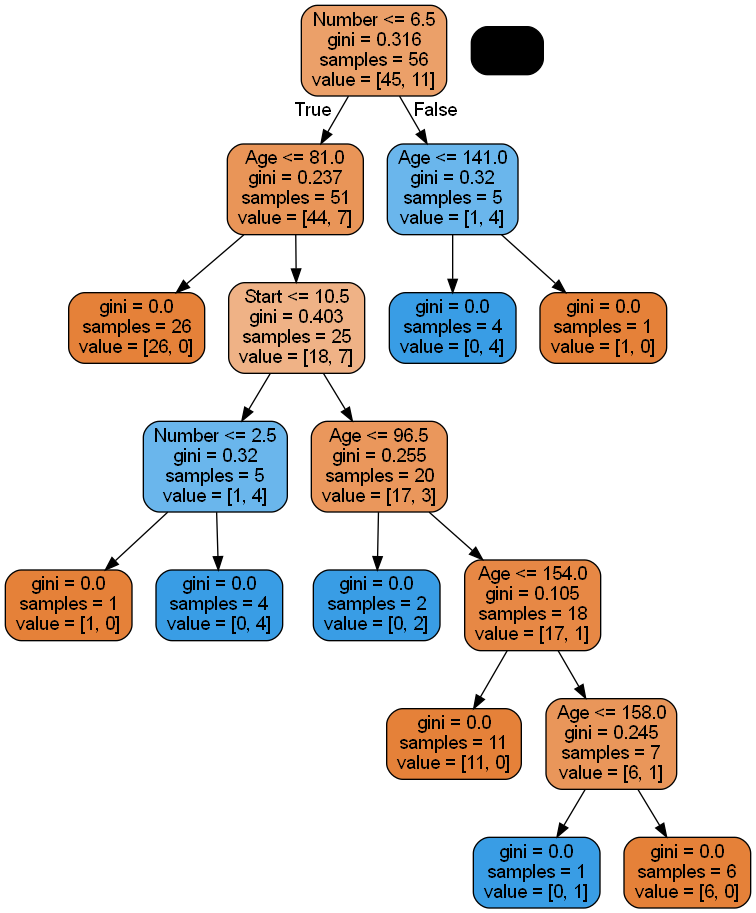

In [69]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# 5. Applying Random Forests

## 5.1 Train the Random Forests Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=100)

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## 5.2 Prediction and Evaluation of RFC

In [61]:
rfc_predictions = rfc.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(confusion_matrix(y_test, rfc_predictions))

[[18  1]
 [ 6  0]]


In [65]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

      absent       0.75      0.95      0.84        19
     present       0.00      0.00      0.00         6

    accuracy                           0.72        25
   macro avg       0.38      0.47      0.42        25
weighted avg       0.57      0.72      0.64        25



## 5.3 Interpretation of RFC Classification Report

* Precision (same as accuracy): 75% of 100% of values assigned as positive are actually positive, and
    25% of 100% assigned as positive are actually false positives, i.e. they are actually negative.

* Recall (same as sensitivity): 5% (100% - 95%) of values assigned as negative, are in reality positive values.

**There are four ways to check if the predictions are right or wrong:**

* TN = True Negative: the case was negative and predicted negative
* TP = True Positive: the case was positive and predicted positive
* FN = False Negative: the case was positive but predicted negative
* FP = False Positive: the case was negative but predicted positive

**Precision = TP/(POSITIVES) = TP/(TP + FP)**

* Same as *accuracy of positive predictions*

* Precision is the ability of a classifier not to label an instance positive that is actually negative.

* The lower the number of false positives, the better the precision (accuracy).

**Recall = TP/(TP+FN)**

* Same as sensitivity or hit rate

* Recall is what percent of positive is really positive

* Recall indicates what percent of the positive cases did we catch

* Recall is the ability of a classifier to find all positive instances.
* The lower the number of false negatives, the better the recall.
* Recall (sensitivity) indicates how many positives were correctly identified among the total of posivites.

**F1 Score = 2 x (Recall x Precision) / (Recall + Precision)**

* F1 score indicates what percent of positive predictions were correct
* The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
* As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support**

* Support is the number of actual occurrences of the class in the specified dataset.